In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import pandas as pd

In [2]:
data = torch.load(r"/home/student/Data-analysis-and-presentation/Data-analysis-and-presentation/HW3/data/hw3/processed/data.pt")

torch.Size([20000, 128])

In [9]:
import os
os.path.relpath(r"/home/student/Data-analysis-and-presentation/Data-analysis-and-presentation/HW3/exp/GNC/models/trained_model.pt") 

'exp/GNC/models/trained_model.pt'

In [3]:
from torch_geometric.nn import GCNConv
import torch
import torch.nn.functional as F
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(128, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, int(hidden_channels/2))
        self.conv3 = GCNConv(int(hidden_channels/2), int(hidden_channels/4))
        self.conv4 = GCNConv(int(hidden_channels/4), int(hidden_channels/8))
        self.conv5 = GCNConv(int(hidden_channels/8), 40)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv3(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv4(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv5(x, edge_index)
        return x
    
def predict(model, dataset):
    model.eval()   
    out = model(dataset.x, dataset.edge_index)
    pred = out.argmax(dim=1)
    return [i for i in range(len(pred))], pred


test_ds = data #= HW3Dataset(root='data/hw3/')

model = GCN(hidden_channels=1024)
model.load_state_dict(torch.load('../HW3/exp/GNC/models/trained_model.pt'))

idx_list, preds = predict(model, test_ds)

pred_df = pd.DataFrame(data={'idx': idx_list, 'prediction': preds})
# pred_df.to_csv('prediction.csv', index=False)

In [ ]:
pred_df.to

In [4]:
G=nx.from_edgelist(data.edge_index.numpy().T.tolist())

We willl note that there are 3423 without neighbors

In [21]:
len(G.nodes)

96577

In [37]:
len(G.edges)

438264

In [8]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
np.percentile(np.array(degree_sequence), [100, 99, 97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10])

array([3.817e+03, 6.600e+01, 4.000e+01, 2.700e+01, 1.900e+01, 1.200e+01,
       8.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
       1.000e+00])

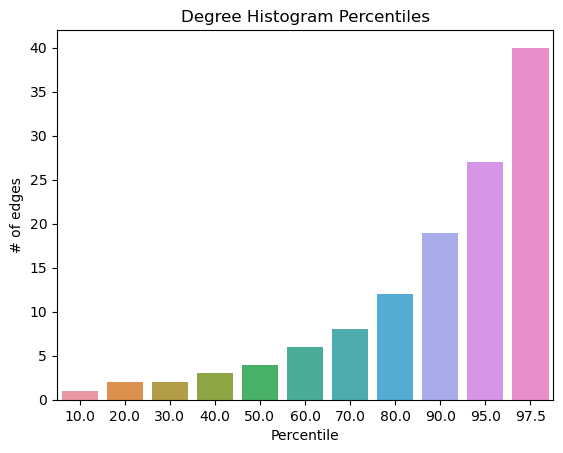

In [10]:
sns.barplot(x=[97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10], y=np.percentile(np.array(degree_sequence), [97.5, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10]))
plt.title("Degree Histogram Percentiles")
plt.ylabel("# of edges")
plt.xlabel("Percentile")
plt.show()

In [13]:
component_sizes

2        408
3        139
4         78
5         35
7         19
6         10
9         10
10         8
8          7
11         6
14         3
13         3
12         3
15         2
20         2
17         1
19         1
21         1
26         1
46         1
120        1
93936      1
Name: count, dtype: int64

22


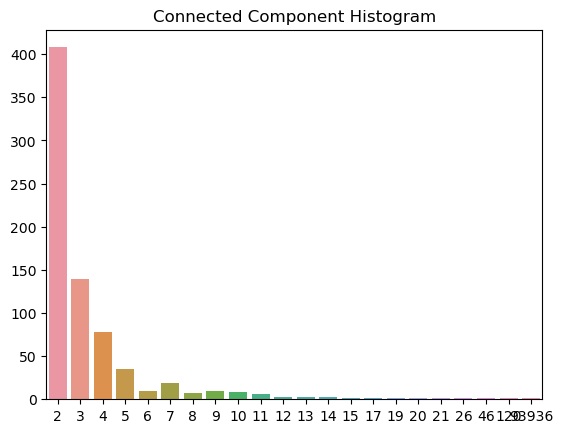

In [12]:
# Connected Component Histogram
component_sizes = pd.DataFrame([len(c) for c in nx.connected_components(G)]).value_counts()
print(len(component_sizes))
sns.barplot(x=list(itertools.chain(*list(component_sizes.index))), y=list(component_sizes.values))
plt.title('Connected Component Histogram')
plt.show()

In [57]:
cc = nx.connected_components(G)

In [20]:
data

Data(x=[100000, 128], edge_index=[2, 444288], y=[100000, 1], node_year=[100000, 1], train_mask=[80000], val_mask=[20000])

In [58]:
train_label_list = list()
val_label_list = list()
for component in cc:
    train_labels = [data.y[n].item() for n in component if n in data.train_mask.tolist()]
    in_val = [41 for n in test if n in data.val_mask.tolist()]
    train_label_list.append(train_labels)
    val_label_list.append(in_val)

In [64]:
all_labels = [data.y[n].item() for n in data.train_mask.tolist()]
temp = pd.DataFrame(all_labels).value_counts()
# sns.barplot(x=list(itertools.chain(*list(temp.index))), y=list(temp.values))
# plt.title(f"All Train Labels")
# plt.show()
temp

28    14328
16     8757
24     6162
34     4783
10     4536
30     3823
8      3573
2      3147
5      2587
4      2539
26     2486
36     2195
9      1986
19     1649
27     1472
37     1404
39     1361
23     1346
20     1334
31     1193
13     1152
22     1120
38      971
3       904
33      828
6       604
14      432
25      407
0       370
11      347
18      345
1       337
7       327
21      263
32      226
15      223
29      212
17      186
35       67
12       18
Name: count, dtype: int64

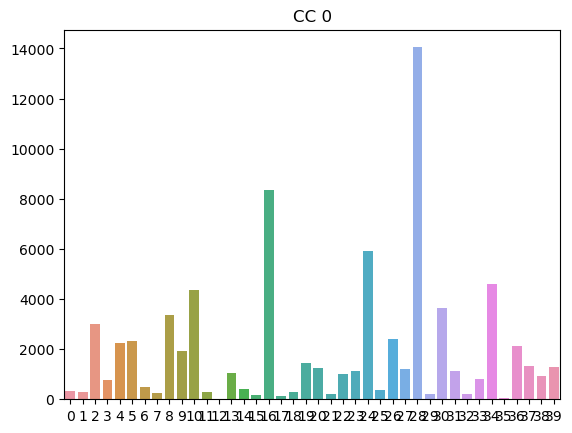

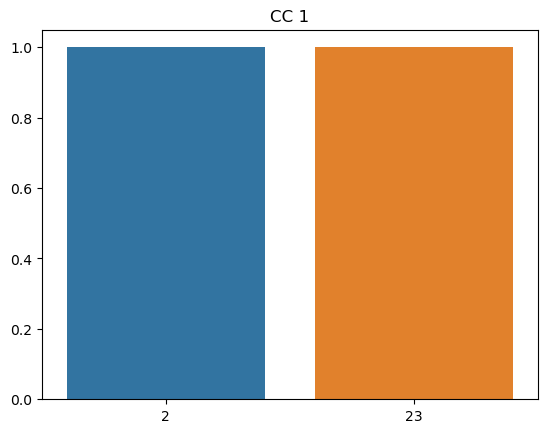

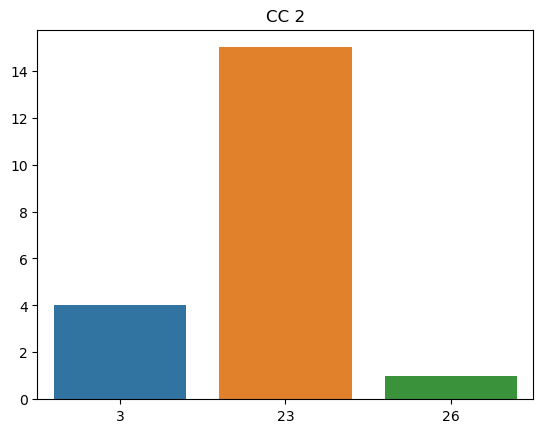

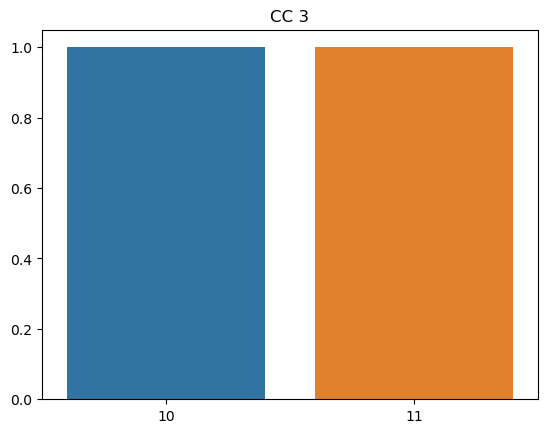

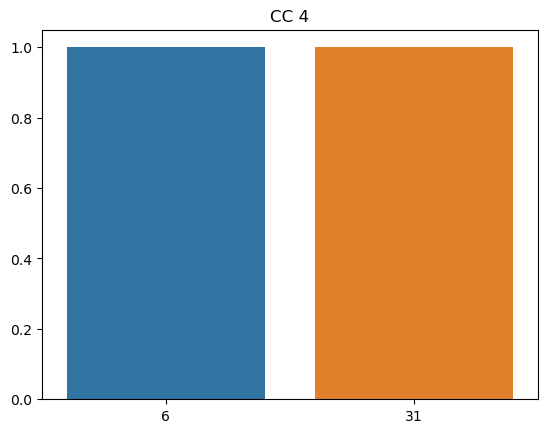

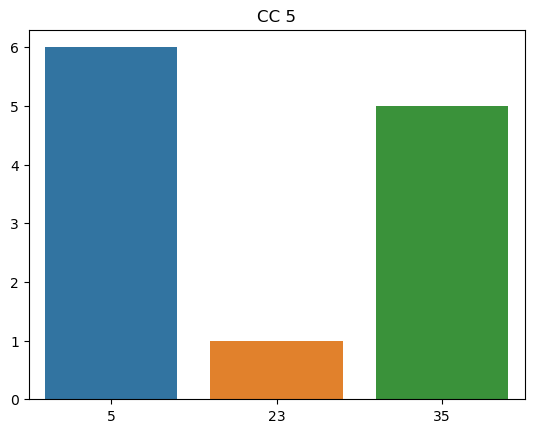

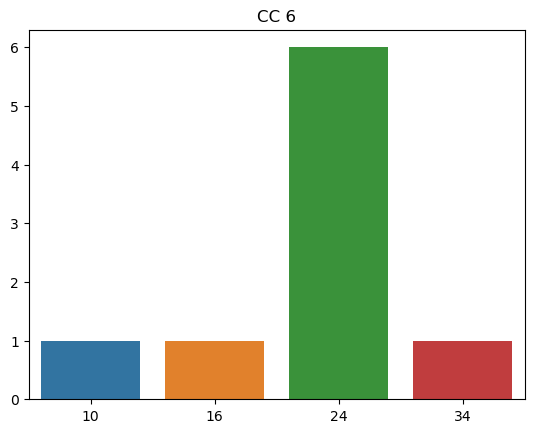

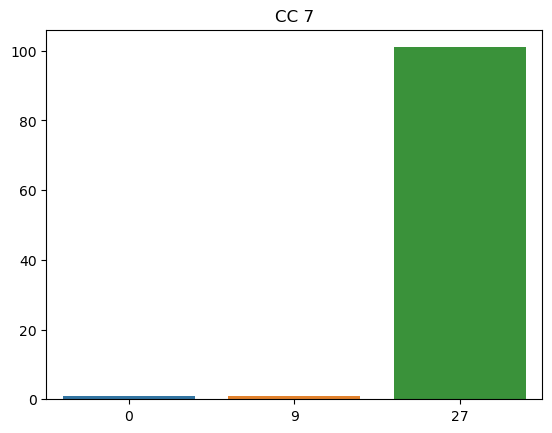

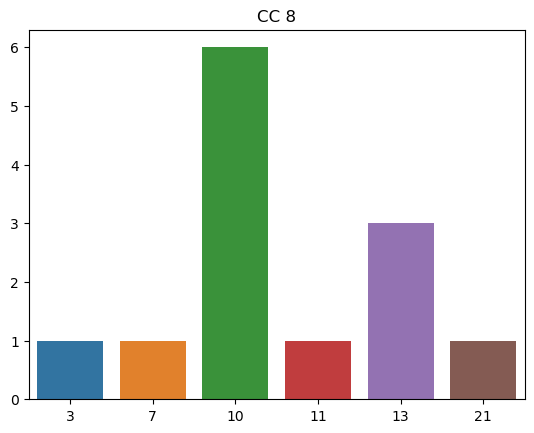

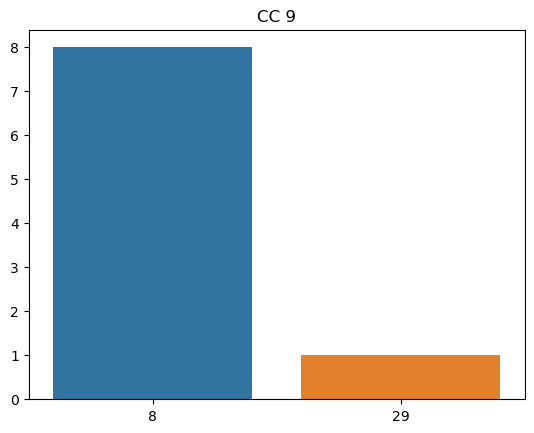

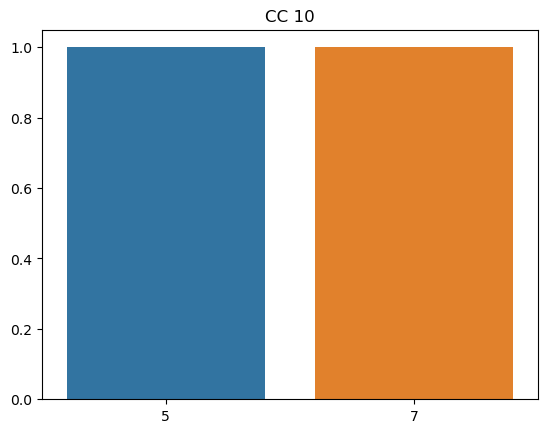

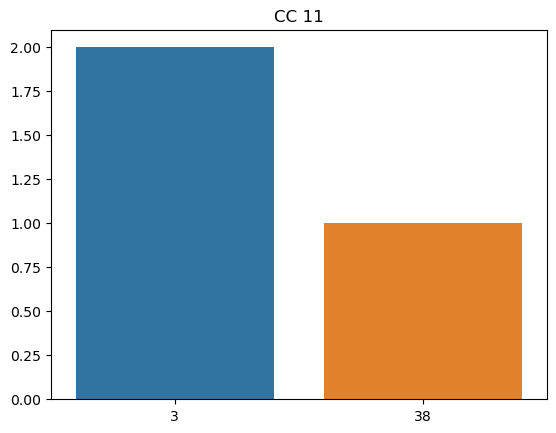

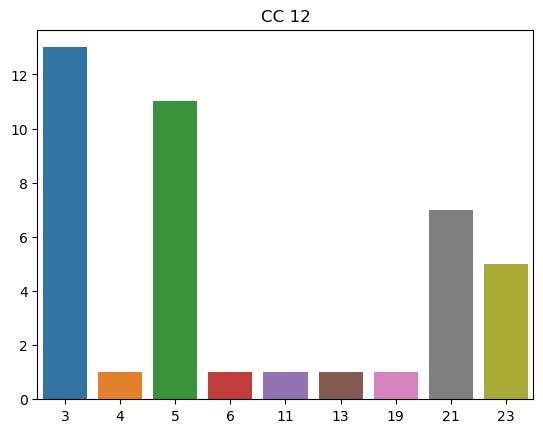

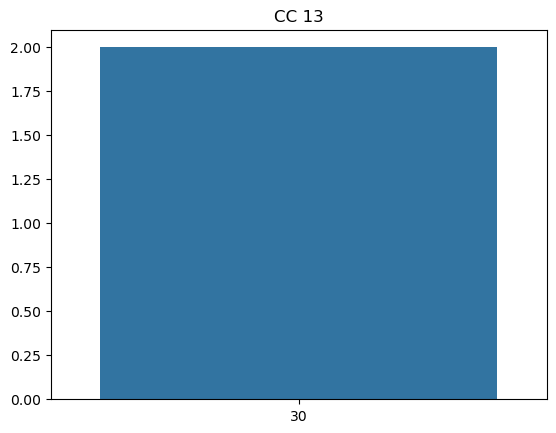

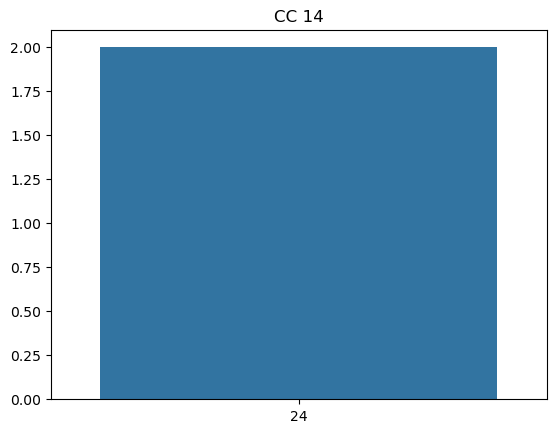

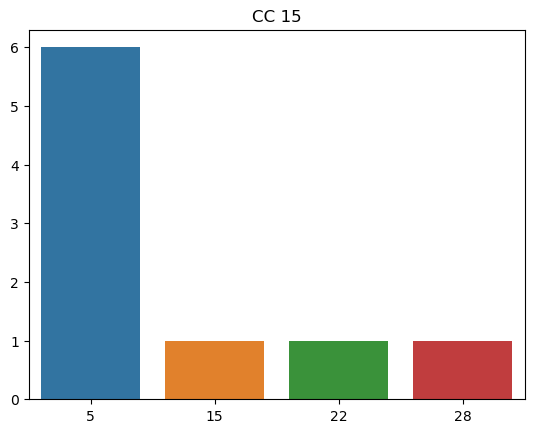

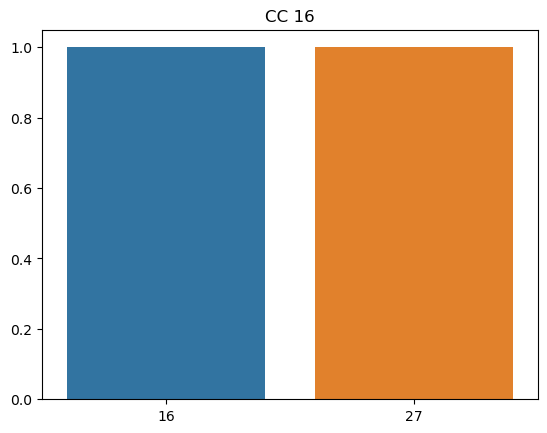

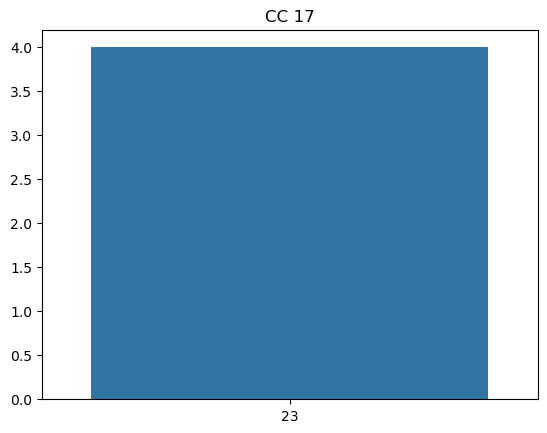

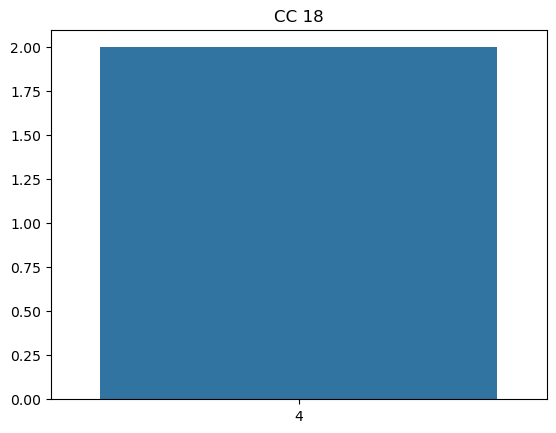

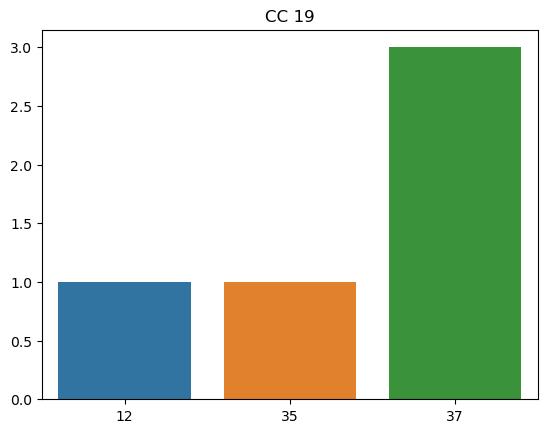

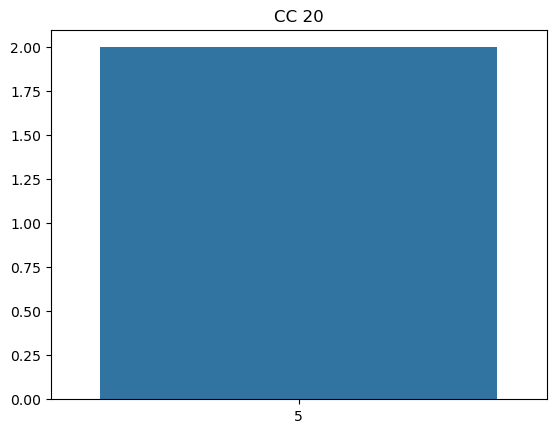

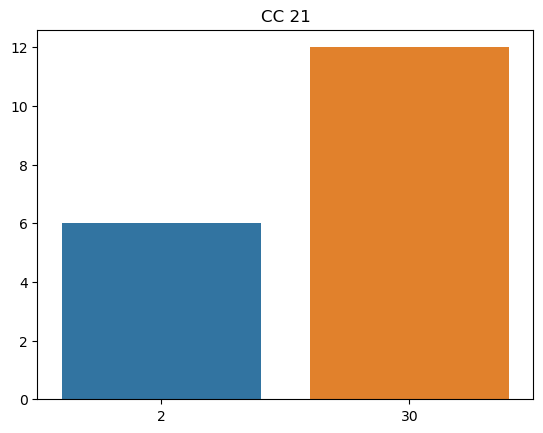

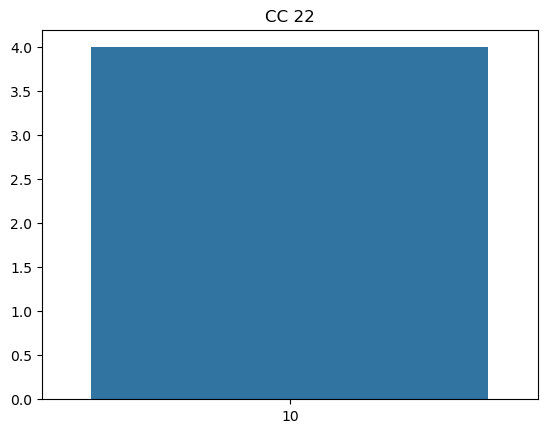

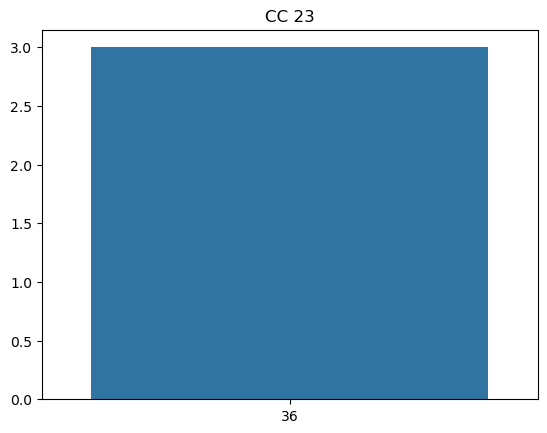

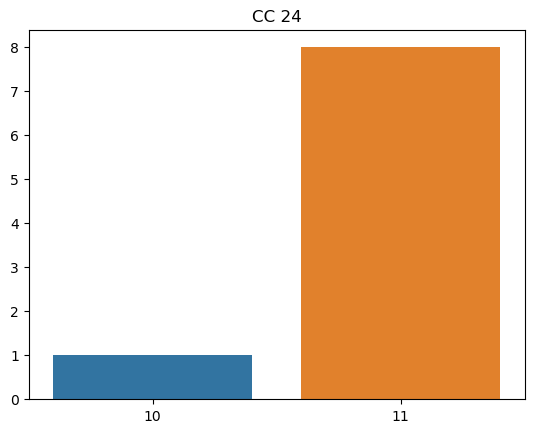

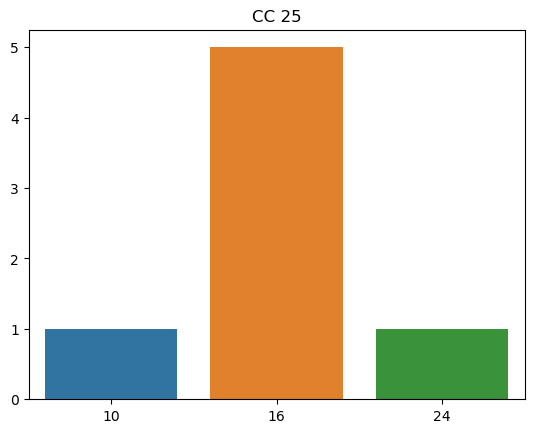

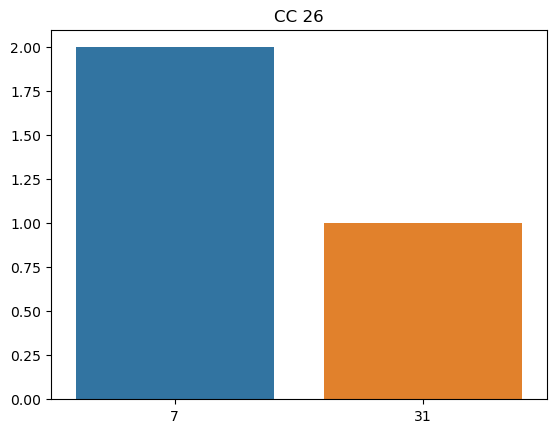

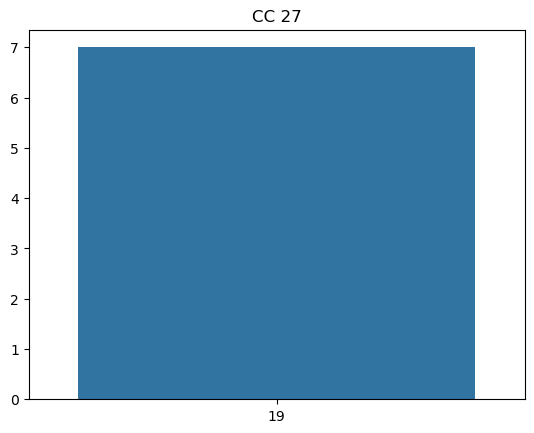

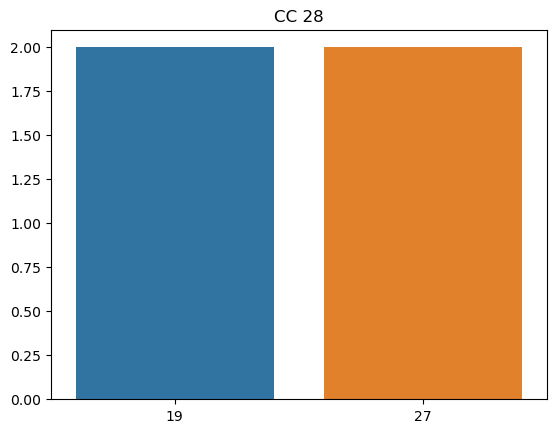

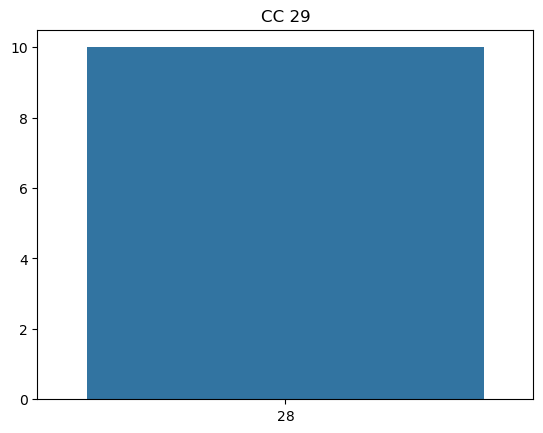

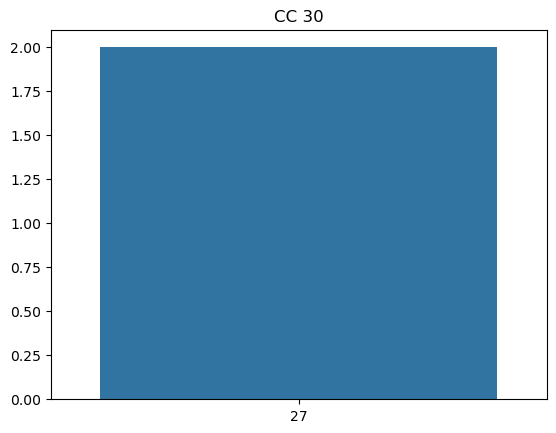

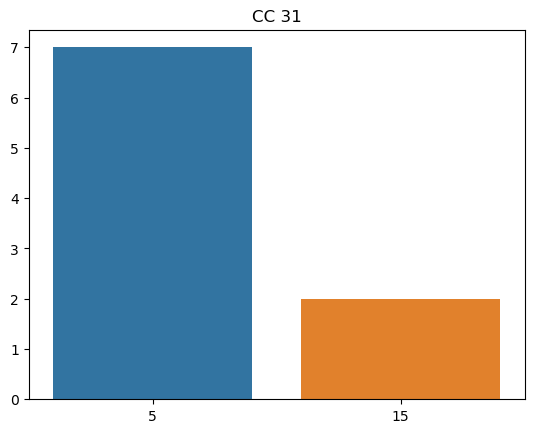

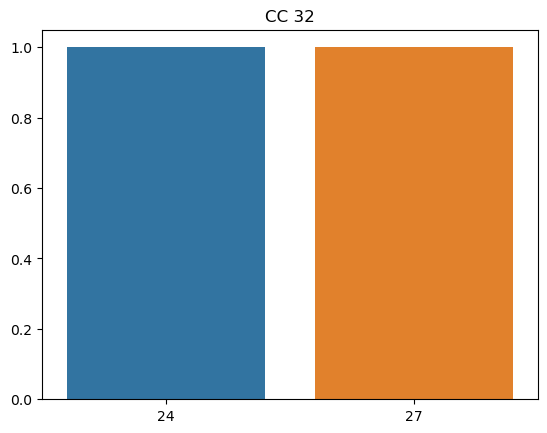

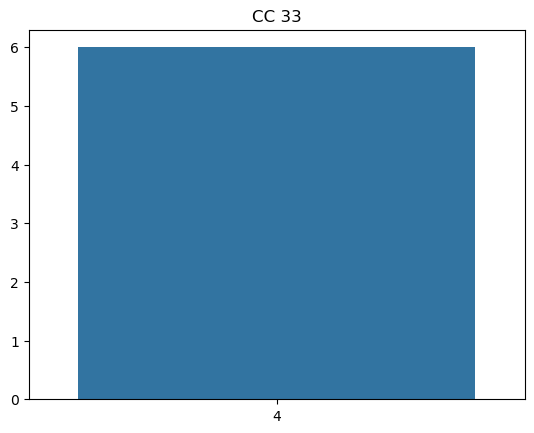

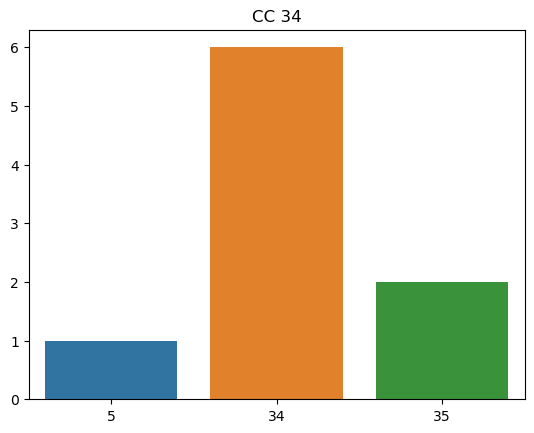

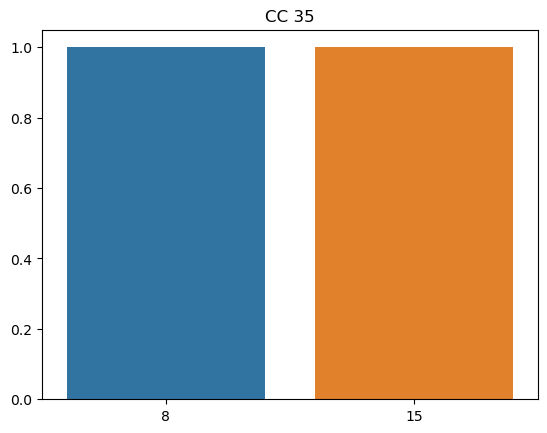

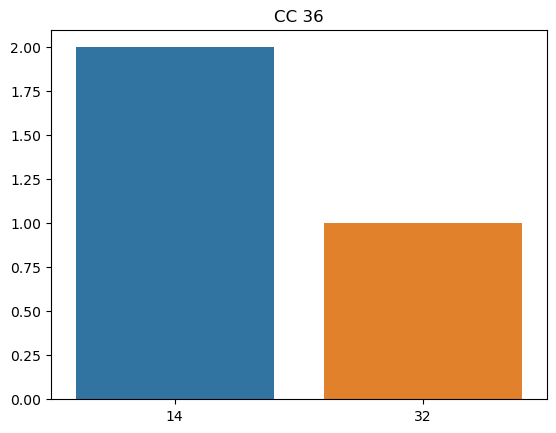

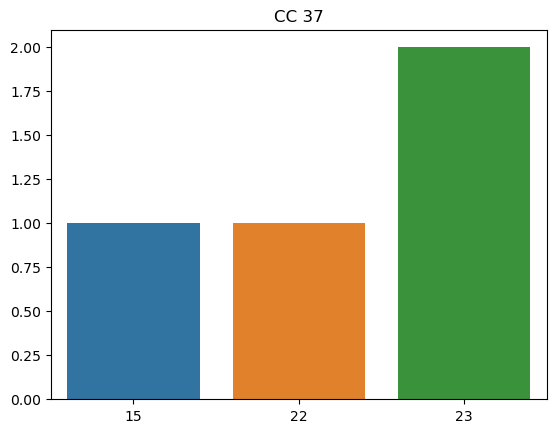

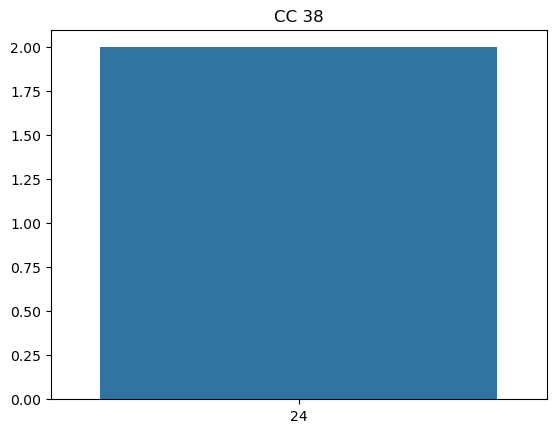

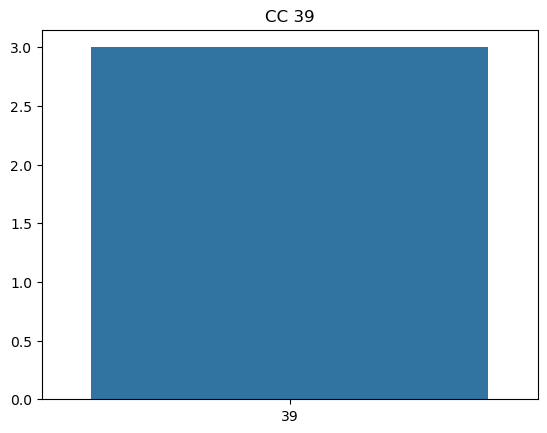

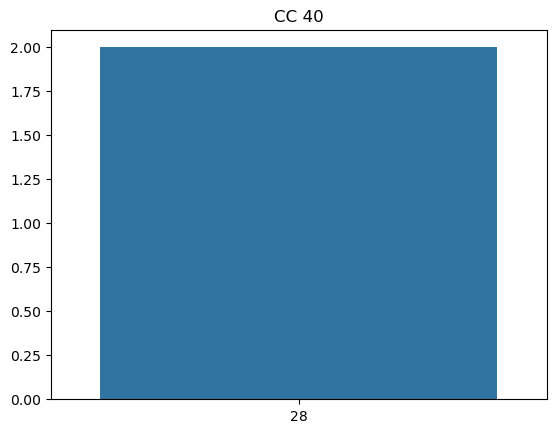

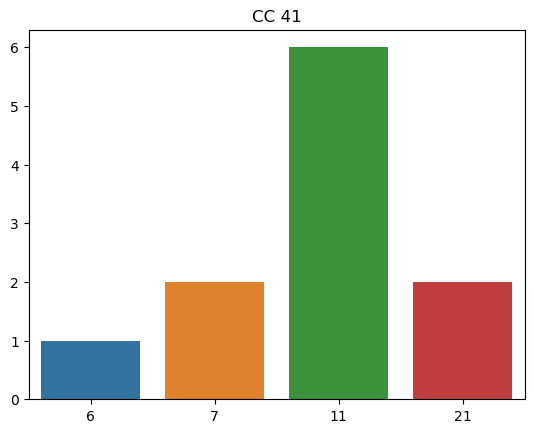

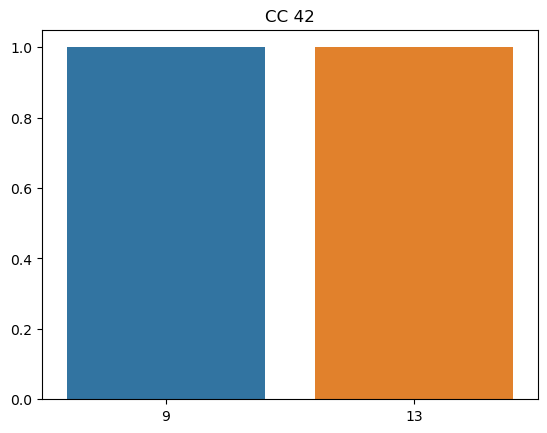

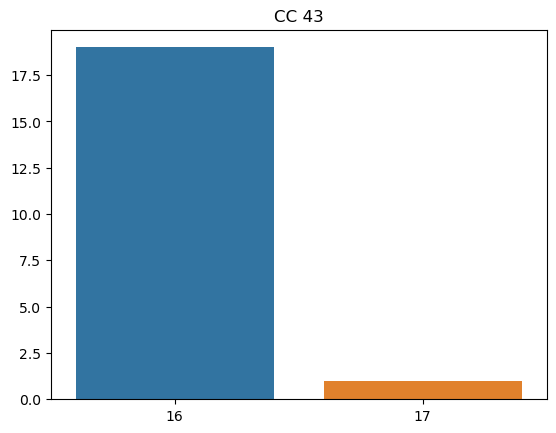

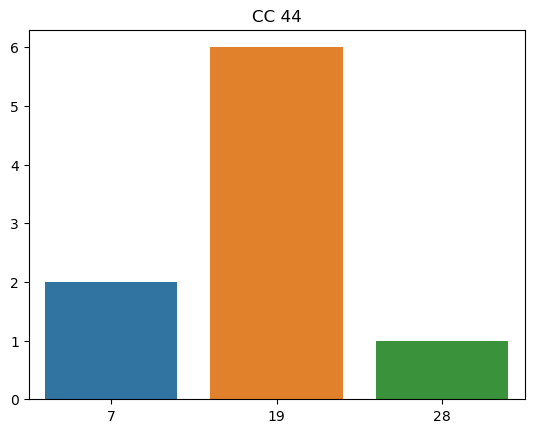

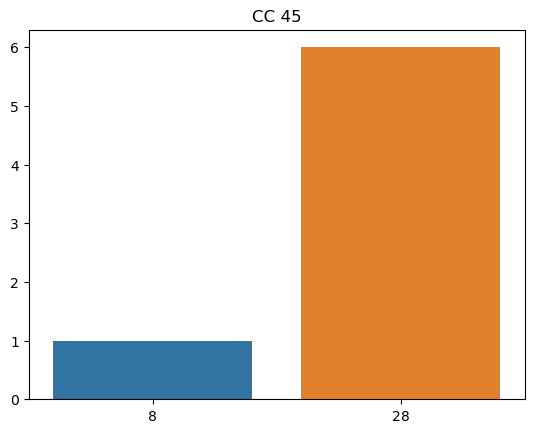

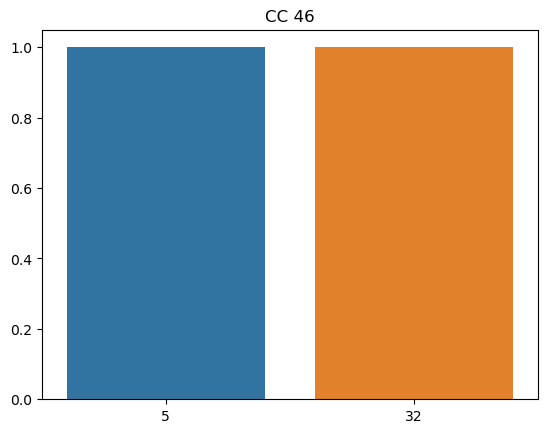

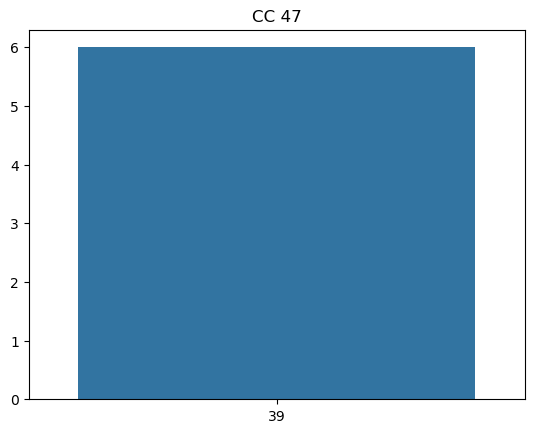

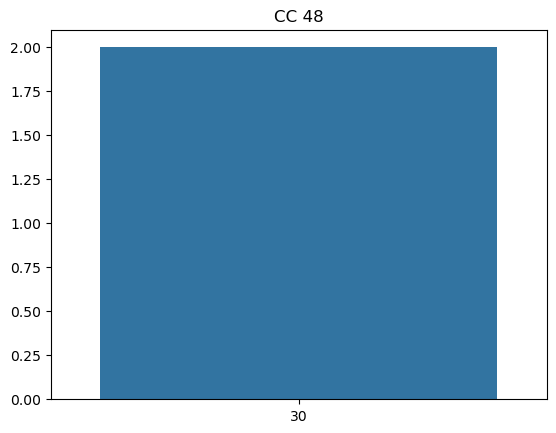

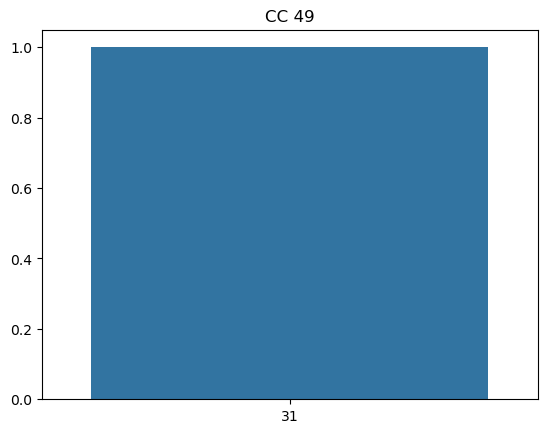

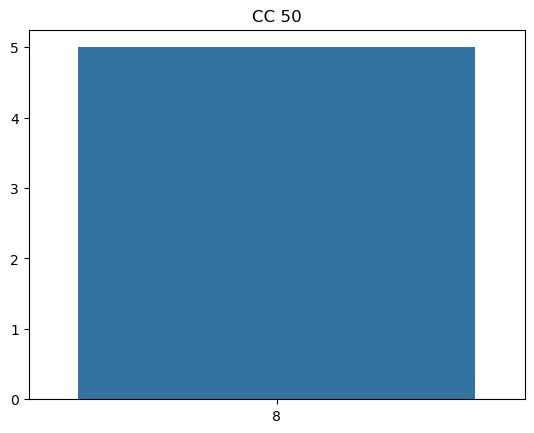

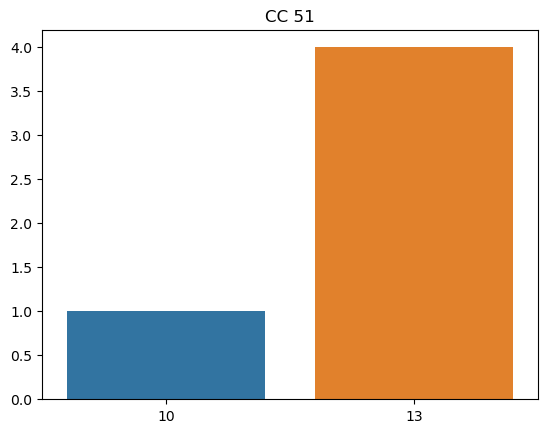

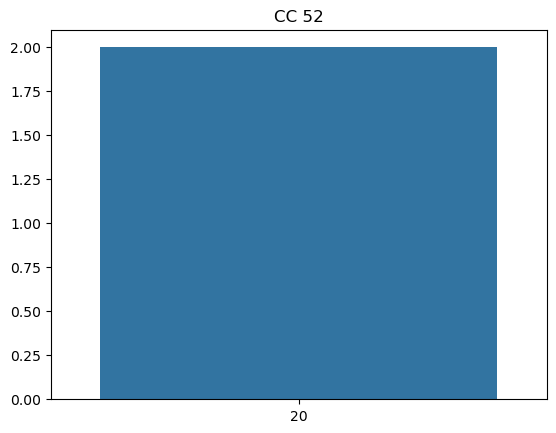

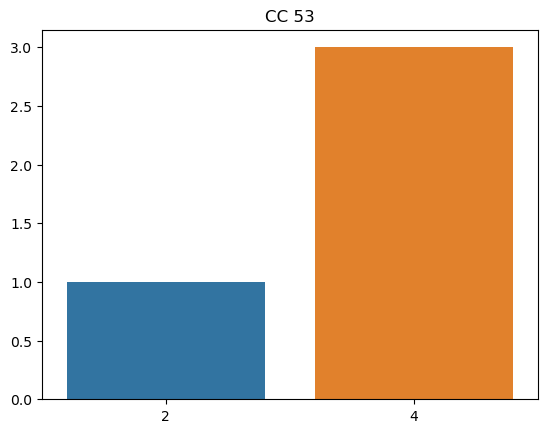

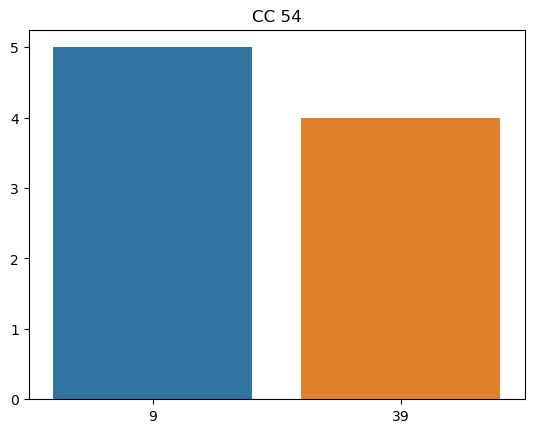

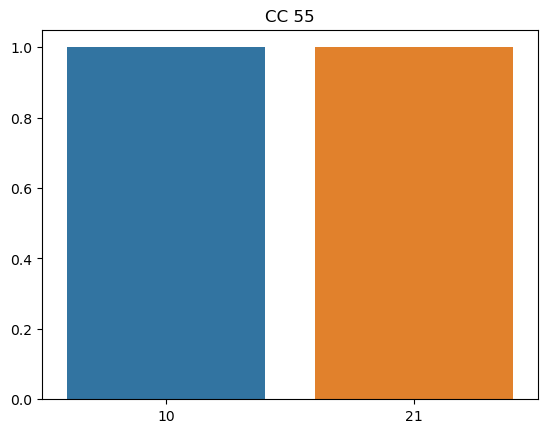

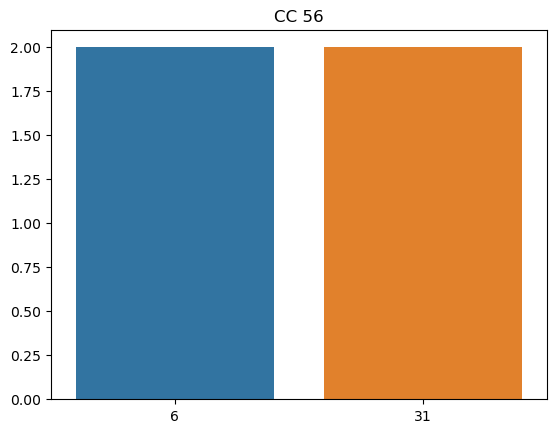

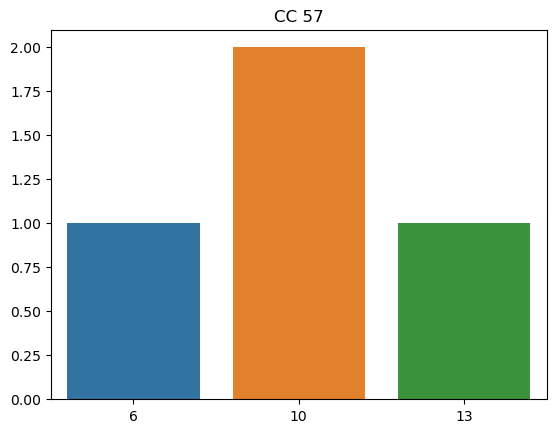

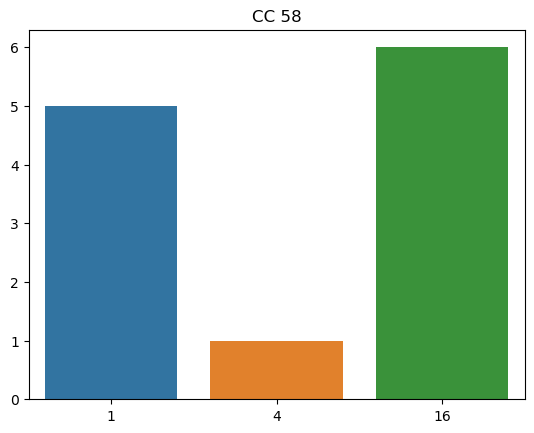

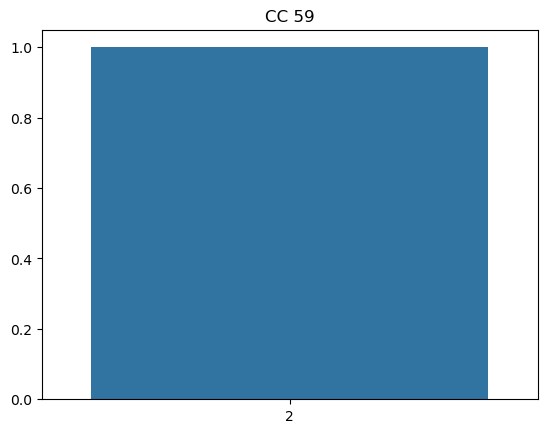

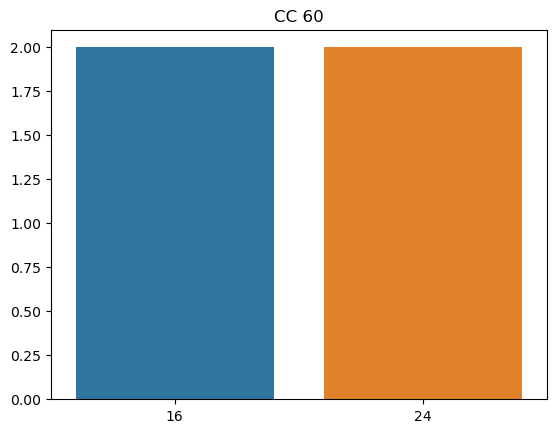

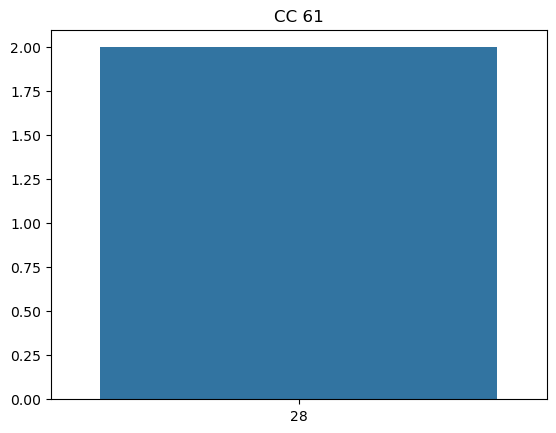

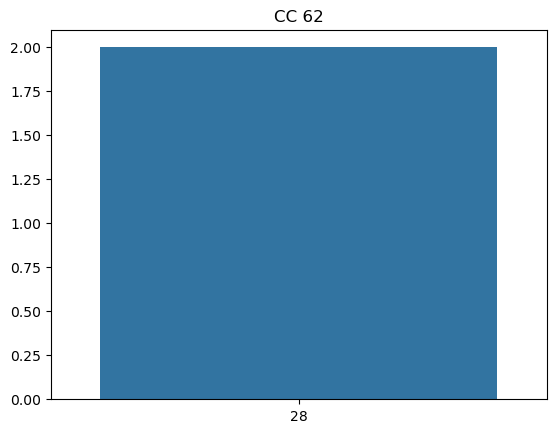

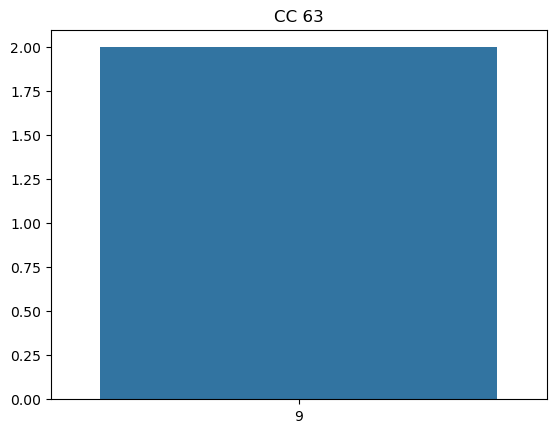

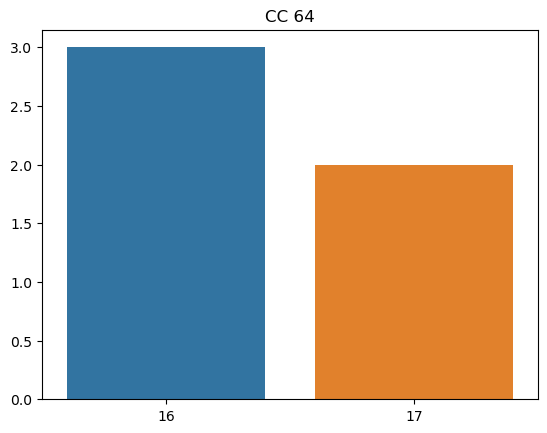

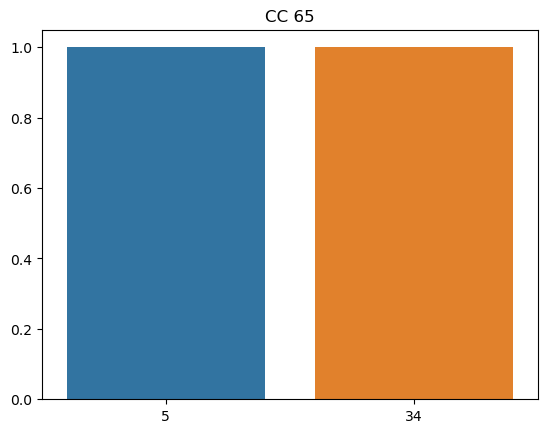

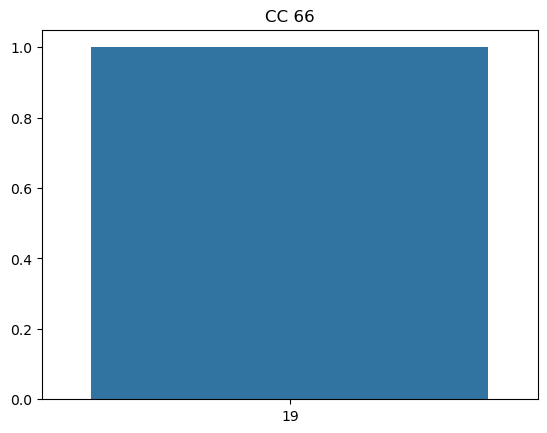

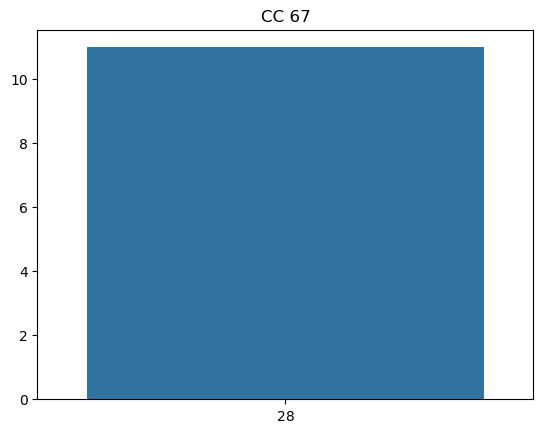

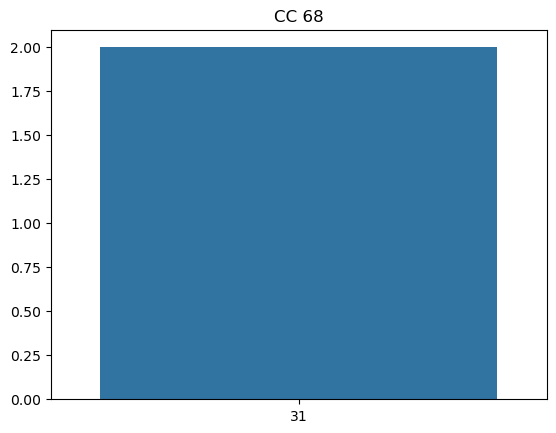

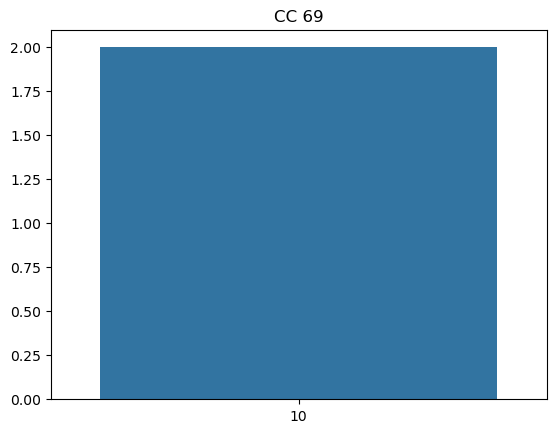

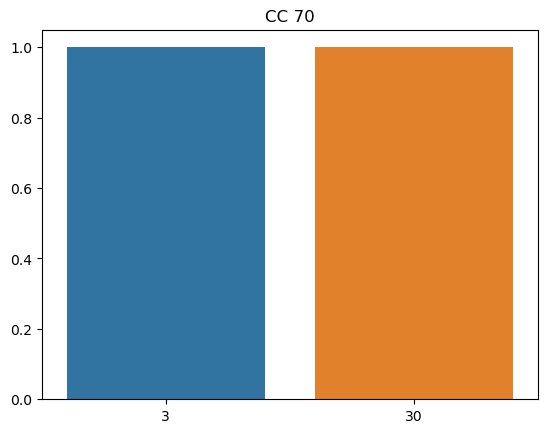

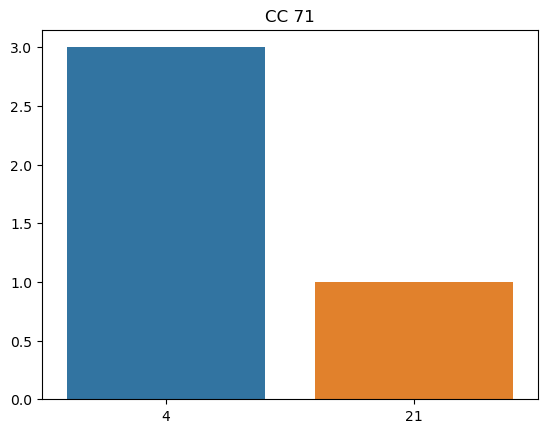

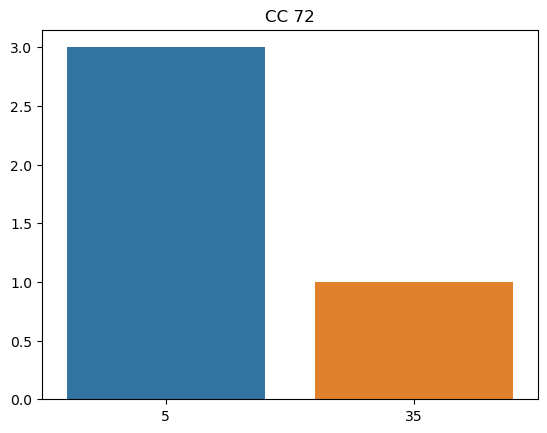

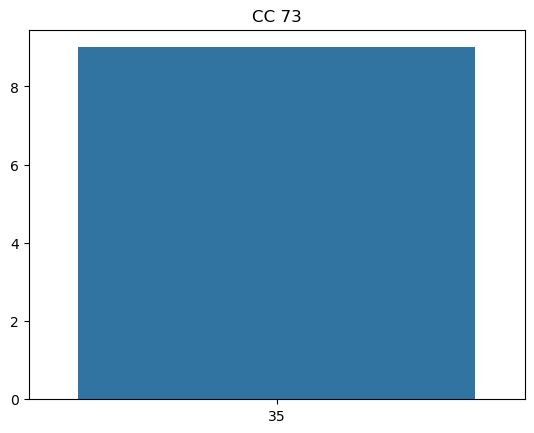

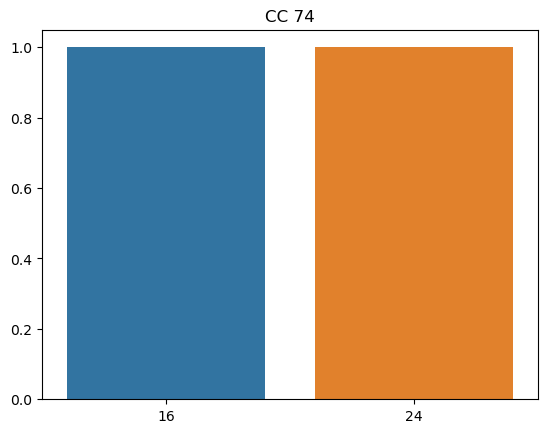

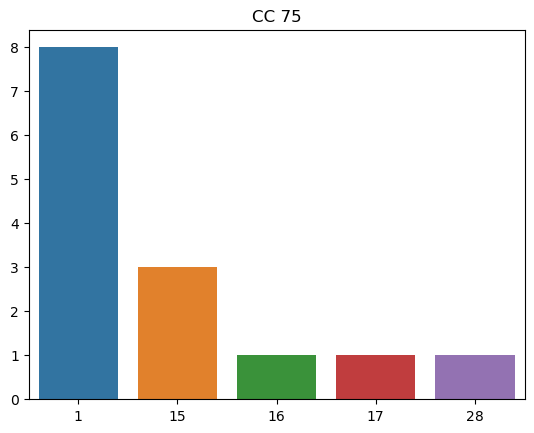

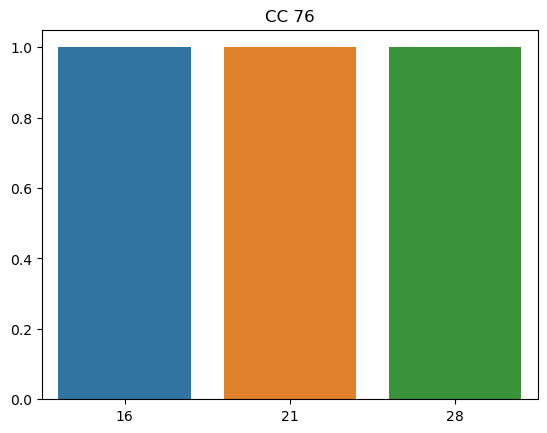

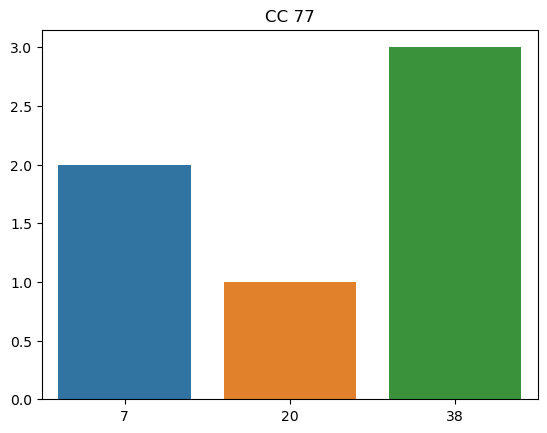

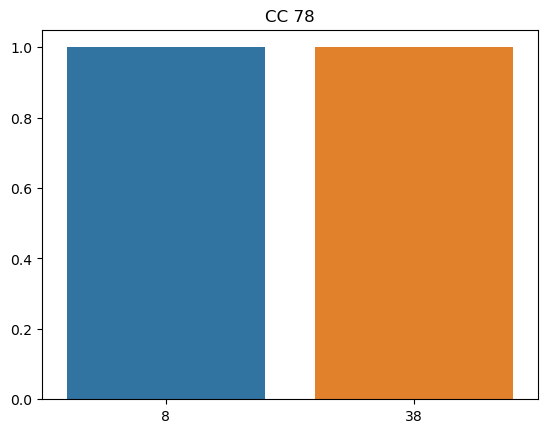

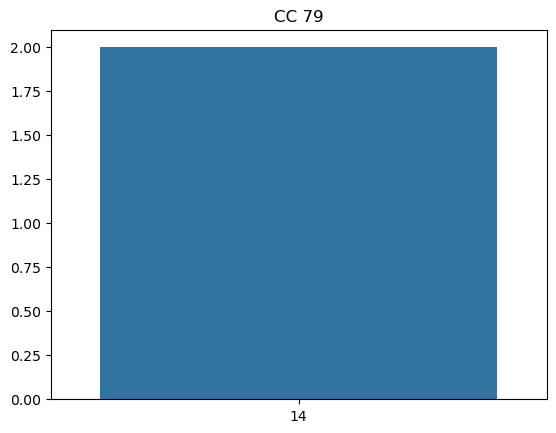

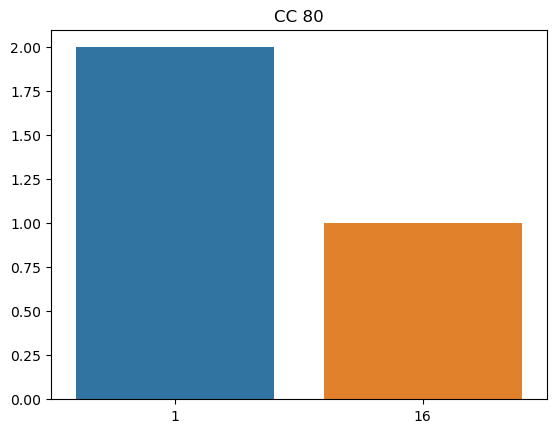

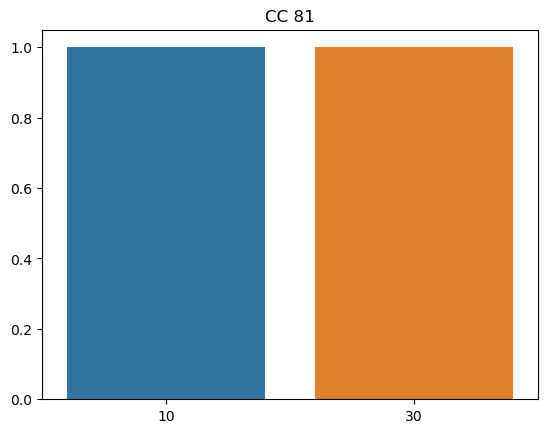

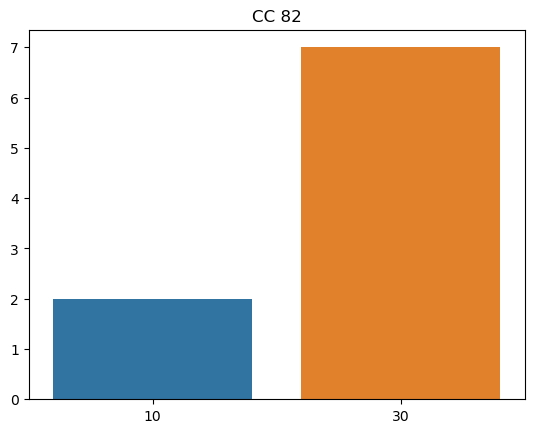

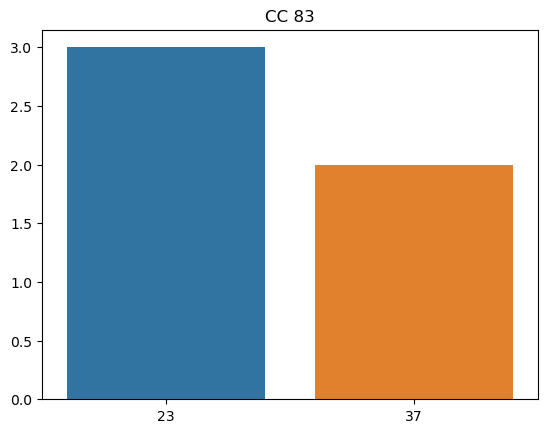

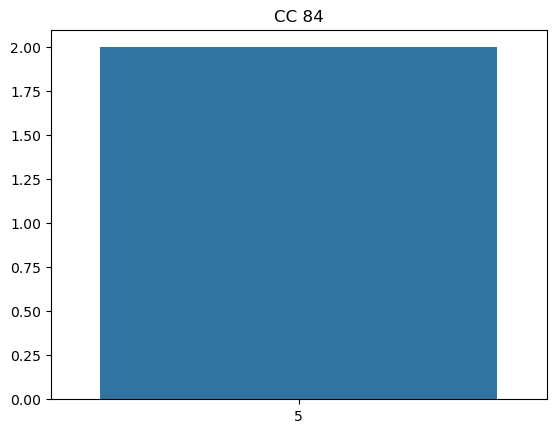

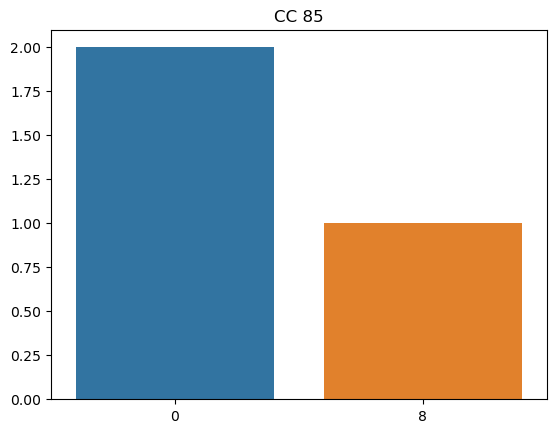

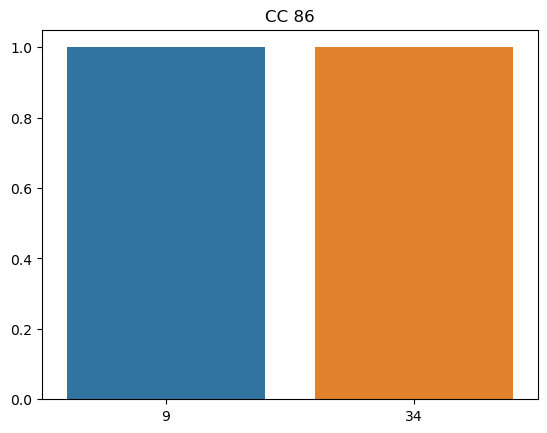

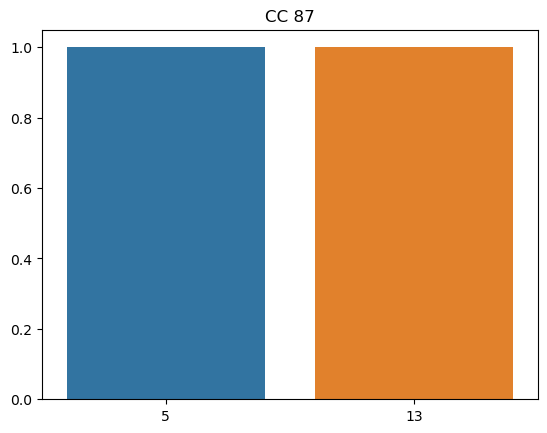

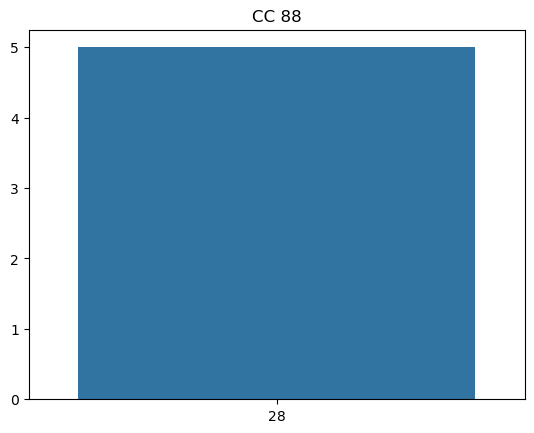

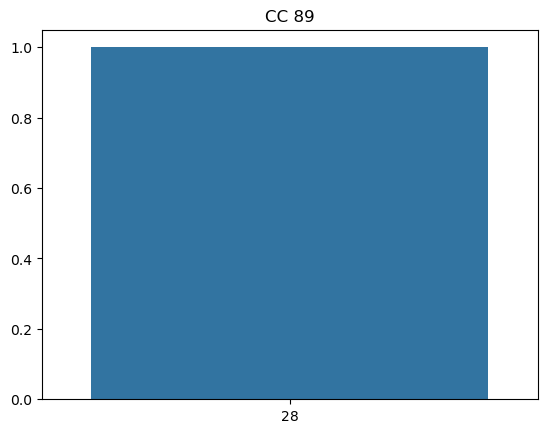

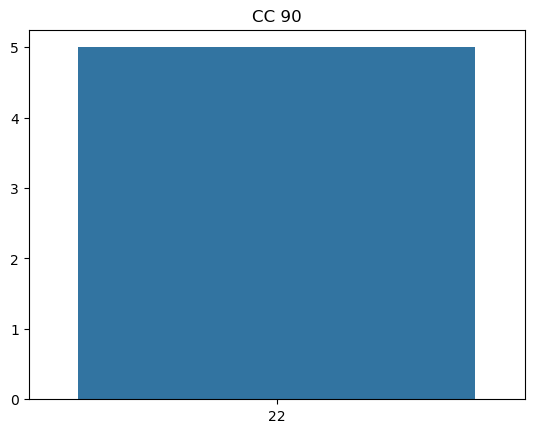

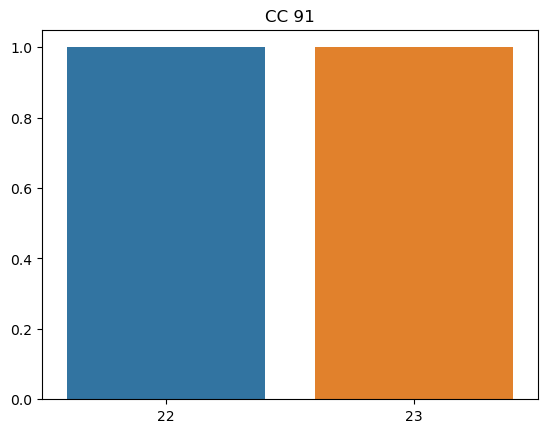

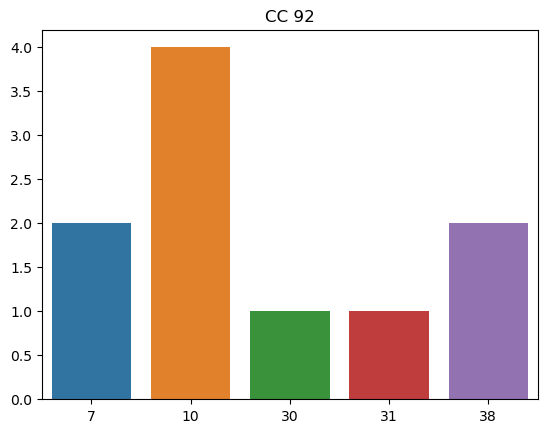

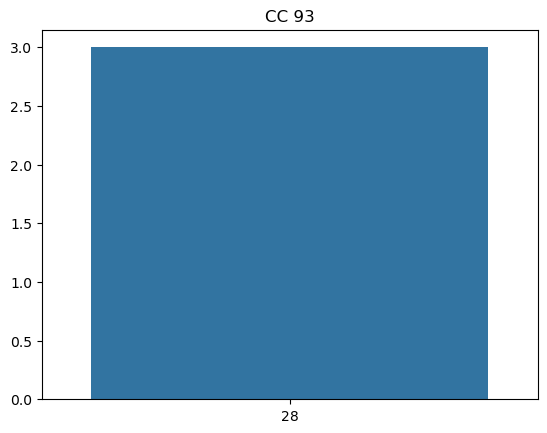

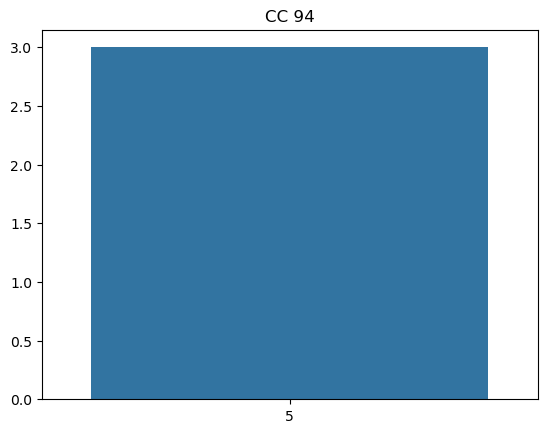

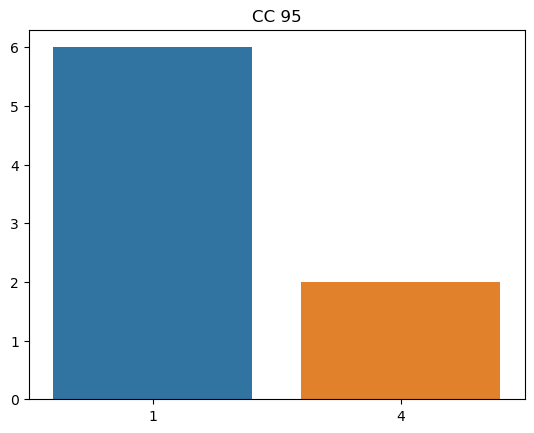

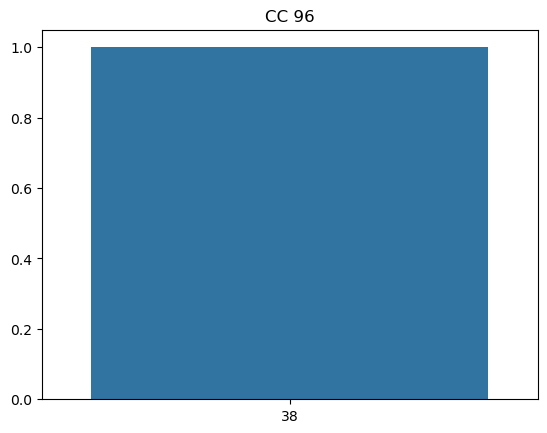

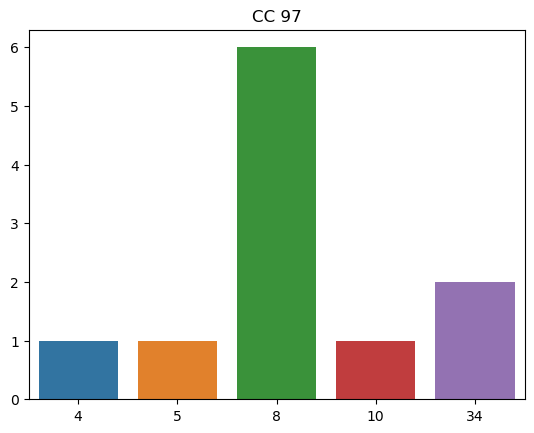

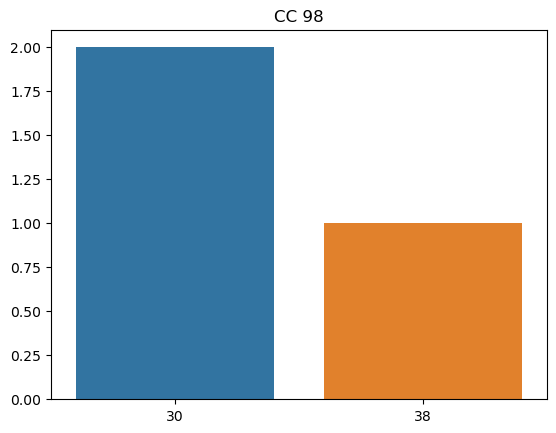

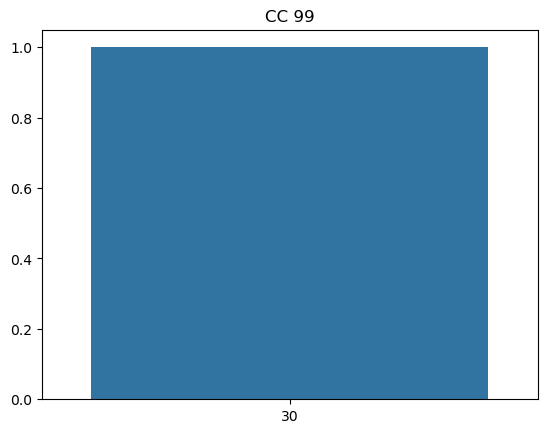

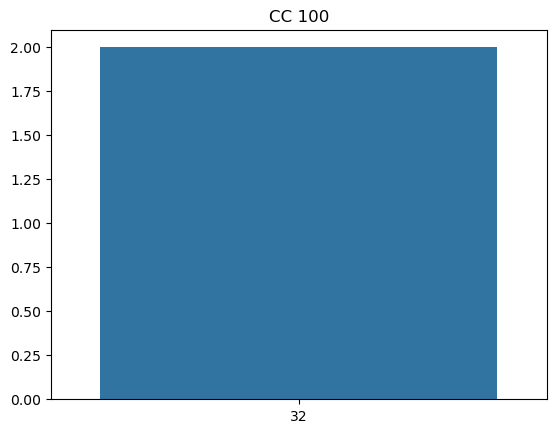

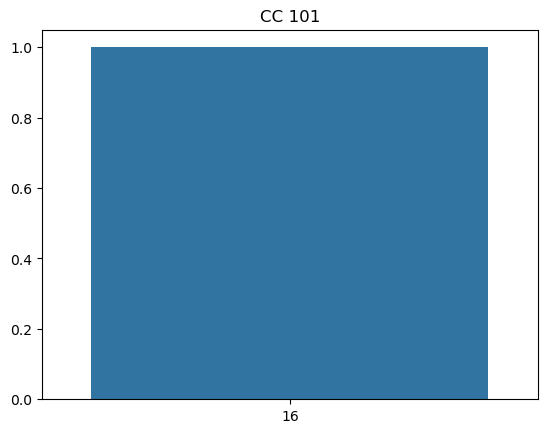

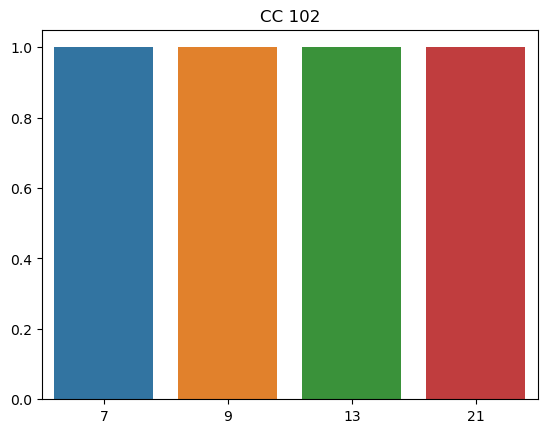

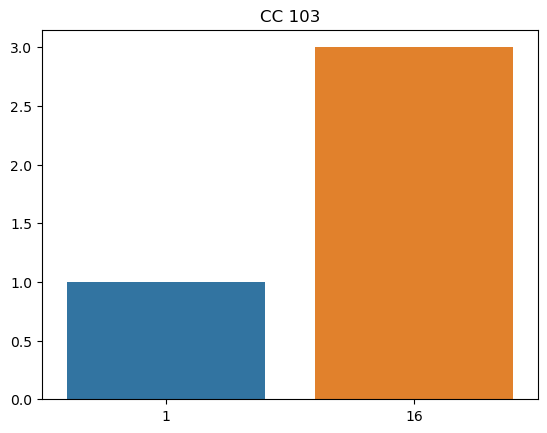

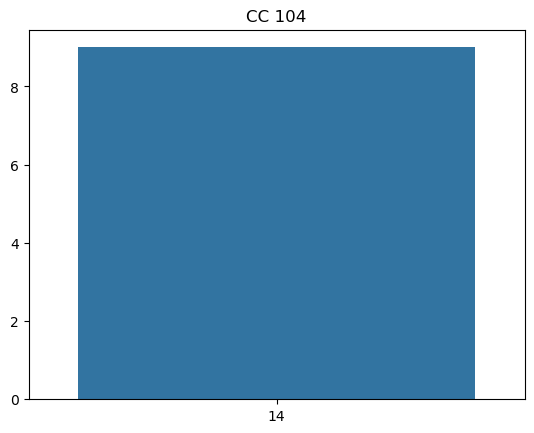

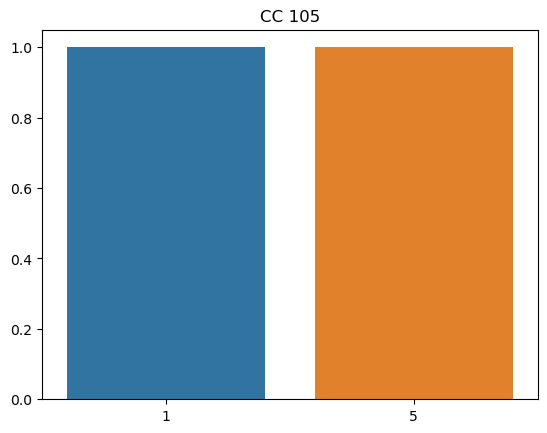

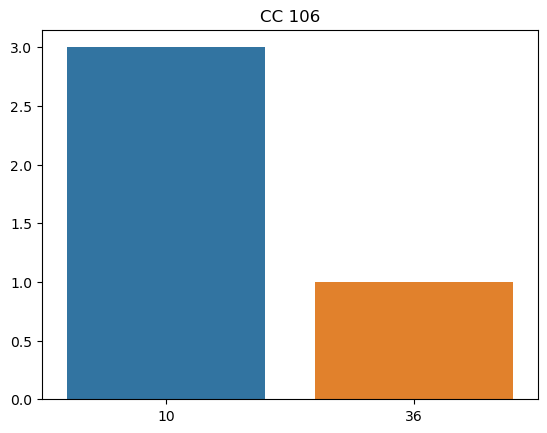

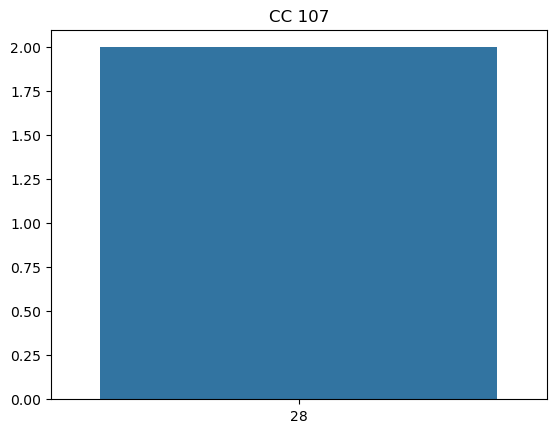

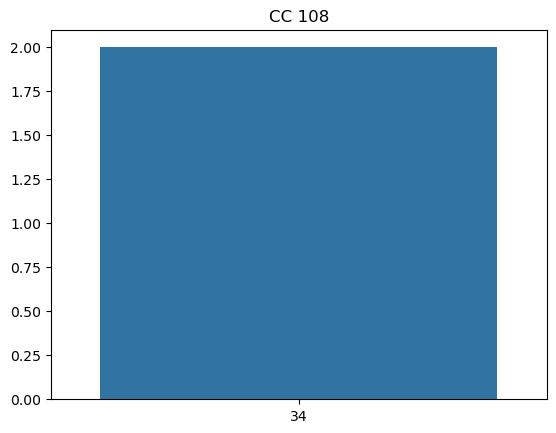

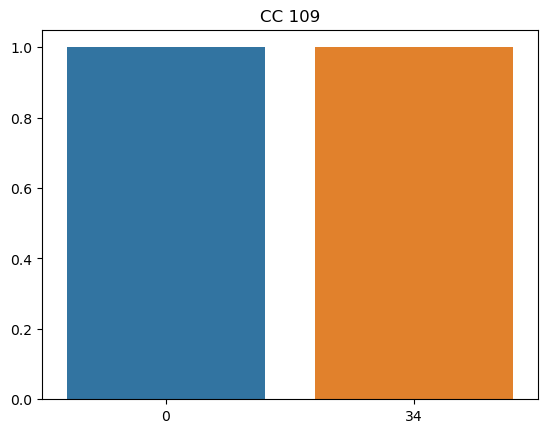

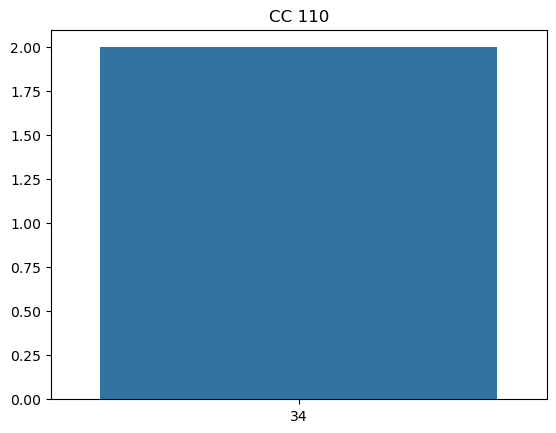

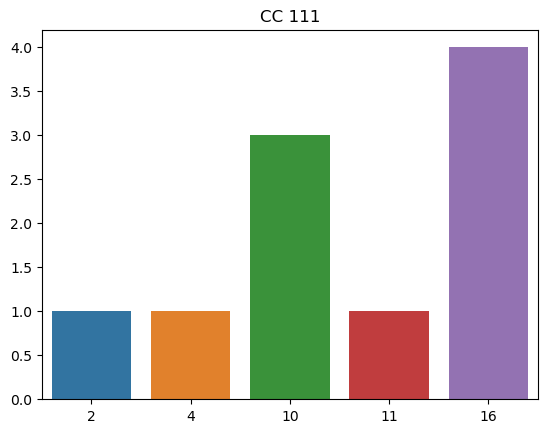

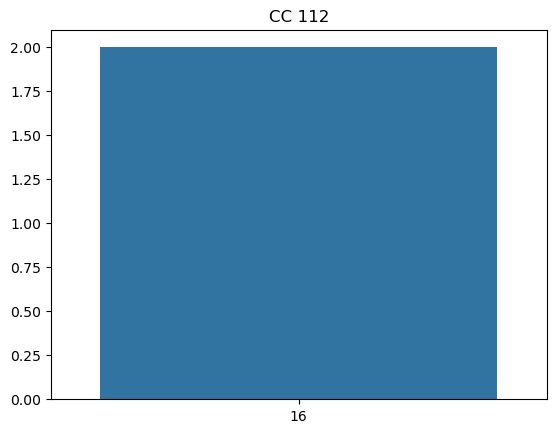

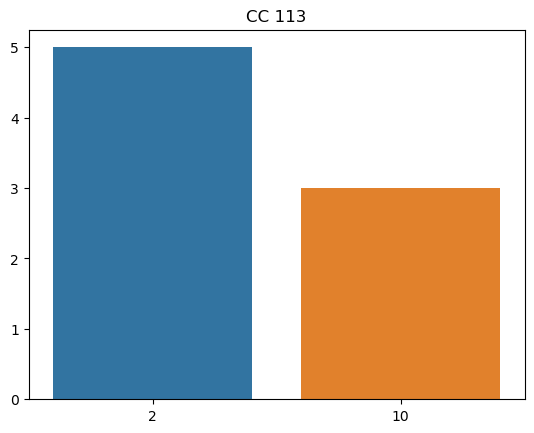

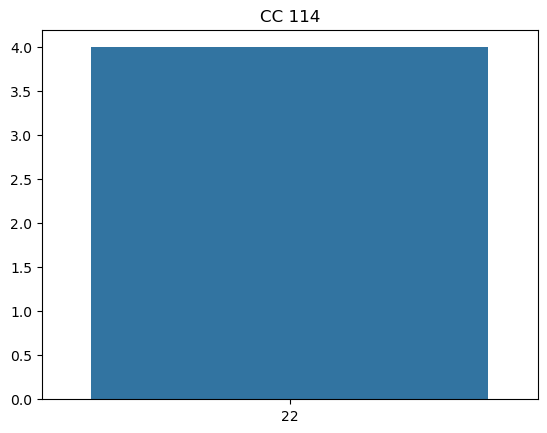

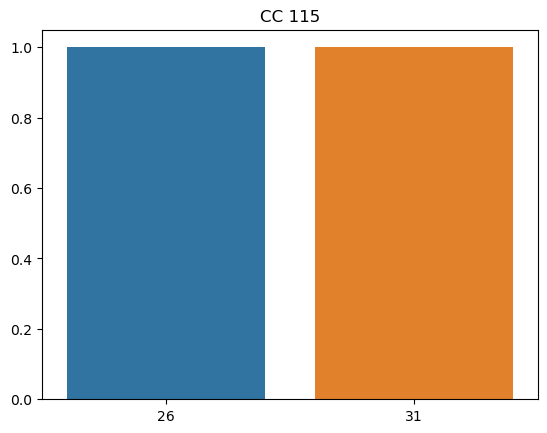

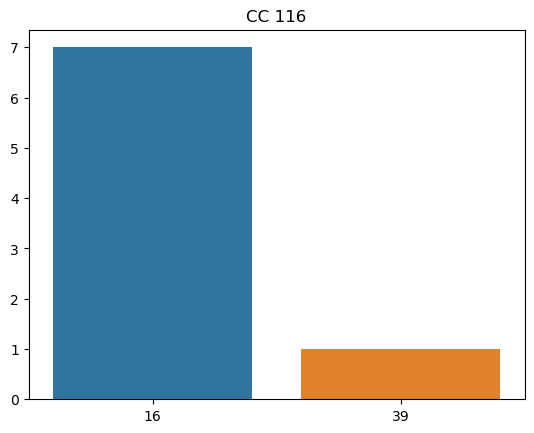

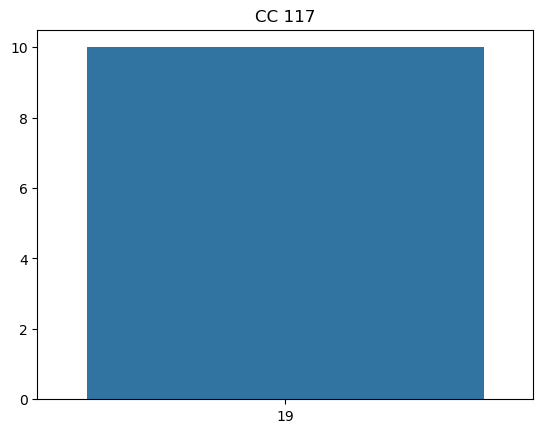

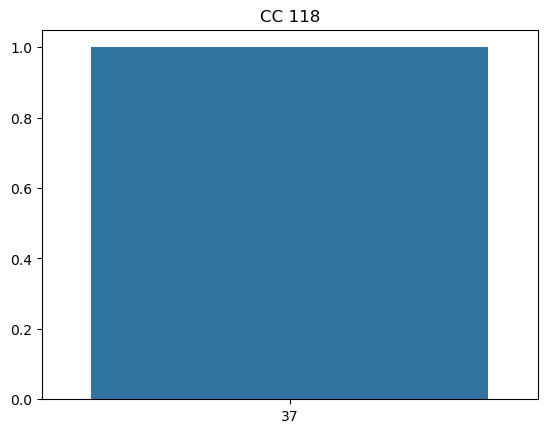

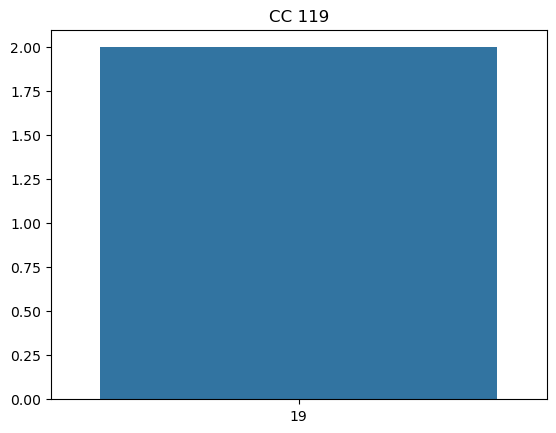

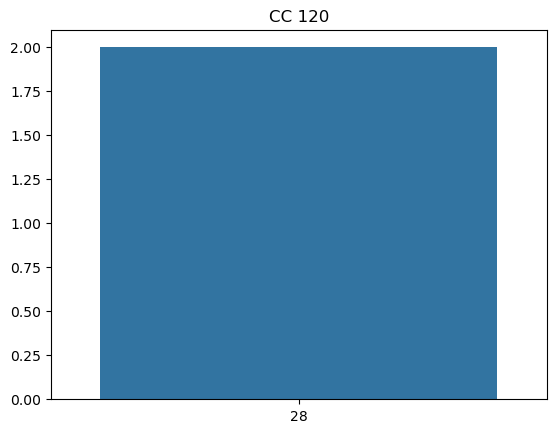

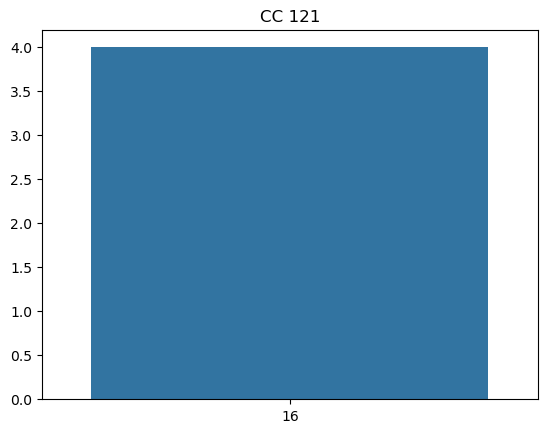

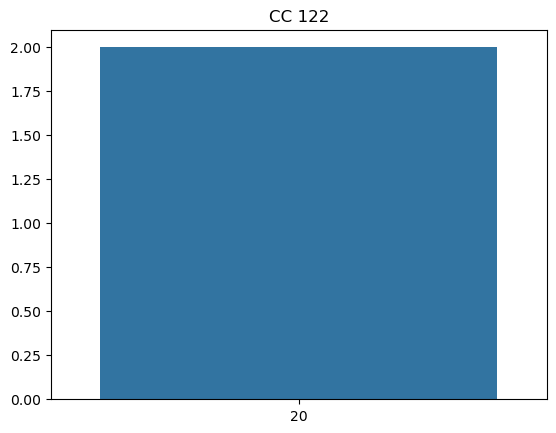

ValueError: min() arg is an empty sequence

In [59]:
for i in range(len(train_label_list)):
    results = train_label_list[i] + val_label_list[i]
    temp = pd.DataFrame(results).value_counts()
    # print(temp)
    sns.barplot(x=list(itertools.chain(*list(temp.index))), y=list(temp.values))
    plt.title(f"CC {i}")
    plt.show()

<Axes: >

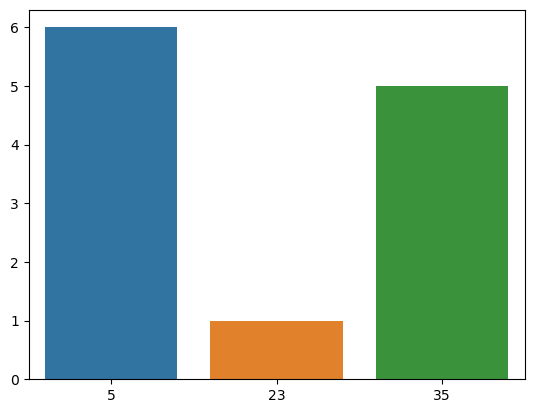

In [53]:
sns.barplot(x=list(itertools.chain(*list(temp.index))), y=list(temp.values))